In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from datetime import datetime

In [4]:
df = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/DeepLearning/age_gender.csv')
df.shape

(23705, 5)

In [5]:
df.head()

,age,race,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
df.gender.value_counts()

gender
0    12391
1    11314
Name: count, dtype: int64

In [7]:
genders = ['male','female']
df.gender = df.gender.apply(lambda x:genders[x])

In [8]:
df.gender.value_counts()

gender
male      12391
female    11314
Name: count, dtype: int64

In [9]:
px = df.pixels[0]
type(px)

str

In [10]:
img1 = np.array(px.split(),dtype='int32').reshape(48,48)

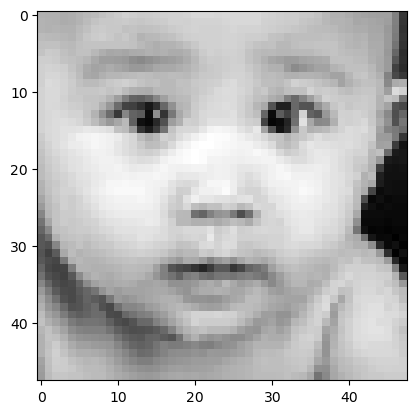

In [11]:
plt.imshow(img1,cmap='gray')
plt.show()

In [12]:
df.pixels = df.pixels.apply(lambda x:np.array(x.split(),dtype='int32').reshape(48,48))
df.head()

,age,race,gender,img_name,pixels
0,1,2,male,20161219203650636.jpg.chip.jpg,"[[129, 128, 128, 126, 127, 130, 133, 135, 139,..."
1,1,2,male,20161219222752047.jpg.chip.jpg,"[[164, 74, 111, 168, 169, 171, 175, 182, 184, ..."
2,1,2,male,20161219222832191.jpg.chip.jpg,"[[67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116..."
3,1,2,male,20161220144911423.jpg.chip.jpg,"[[193, 197, 198, 200, 199, 200, 202, 203, 204,..."
4,1,2,male,20161220144914327.jpg.chip.jpg,"[[202, 205, 209, 210, 209, 209, 210, 211, 212,..."


In [13]:
type(df.pixels[0])

numpy.ndarray

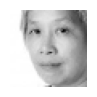

In [14]:
k = np.random.randint(23705)
plt.figure(figsize=[1,1])
plt.imshow(df.pixels[k],cmap='gray')
plt.axis(False)
plt.show()

In [15]:
X = np.zeros((23705,48,48))
X.shape

(23705, 48, 48)

In [16]:
for i in range(23705):
    X[i] = df.pixels[i]

In [17]:
X

array([[[129., 128., 128., ..., 118.,  99.,  53.],
        [130., 129., 128., ..., 117.,  98.,  52.],
        [131., 129., 130., ..., 114.,  97.,  50.],
        ...,
        [121., 138., 147., ..., 151., 150., 148.],
        [117., 137., 146., ..., 149., 148., 148.],
        [115., 135., 142., ..., 146., 146., 146.]],

       [[164.,  74., 111., ..., 111., 111., 104.],
        [179.,  70., 128., ..., 112., 113., 108.],
        [176.,  71., 146., ..., 112., 112., 109.],
        ...,
        [192., 196., 235., ..., 111., 124., 112.],
        [230., 226., 233., ..., 198., 197., 180.],
        [238., 239., 233., ..., 182., 170., 148.]],

       [[ 67.,  70.,  71., ..., 197., 194., 192.],
        [ 65.,  66.,  69., ..., 197., 194., 192.],
        [ 61.,  63.,  69., ..., 197., 194., 190.],
        ...,
        [159., 157., 159., ..., 114., 105., 105.],
        [102., 114., 110., ..., 114., 110., 107.],
        [ 98.,  97.,  95., ..., 112., 111., 108.]],

       ...,

       [[ 59.,  50.,  37

In [18]:
y = df.gender
y

0          male
1          male
2          male
3          male
4          male
          ...  
23700    female
23701    female
23702    female
23703    female
23704    female
Name: gender, Length: 23705, dtype: object

In [19]:
y = pd.get_dummies(y,dtype='int32')
y

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23700,1,0
23701,1,0
23702,1,0
23703,1,0


In [20]:
X.shape, y.shape

((23705, 48, 48), (23705, 2))

In [42]:
model = Sequential()

model.add(Input(shape=(48,48,1)))

model.add(Conv2D(filters=400,kernel_size=(2,2),strides=1,padding="same"))
model.add(Activation('relu'))

#Max Pooling Layer 1

model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

#Convolution Layer 2

model.add(Conv2D(filters=200,kernel_size=(2,2),strides=1,padding="same"))
model.add(Activation('relu'))

#Max Pooling Layer 2

model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

#Convolution Layer 3

model.add(Conv2D(filters=100,kernel_size=(2,2),strides=1,padding="same"))
model.add(Activation('relu'))

#Max Pooling Layer 3

model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

#Flatten Layer
model.add(Flatten())


#Hidden Layer

model.add(Dense(10,use_bias=True))
model.add(Activation('relu'))


#Output layer
model.add(Dense(2))
model.add(Activation('softmax'))



In [ ]:
filters: int, the dimension of the output space (the number of filters
        in the convolution).

padding: string, either `"valid"` or `"same"` (case-insensitive).
        `"valid"` means no padding. `"same"` results in padding evenly to
        the left/right or up/down of the input. When `padding="same"` and
        `strides=1`, the output has the same size as the input.

In [43]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 48, 48, 400)    │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 48, 48, 400)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 24, 24, 400)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 24, 24, 200)    │       320,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 24, 24, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 12, 12, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 12, 12, 100)    │        80,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 12, 12, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 6, 6, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │        36,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,332 (1.67 MB)

 Trainable params: 438,332 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model = Sequential()

model.add(Input(shape=(48,48,1)))

model.add(Conv2D(filters=400,kernel_size=(2,2),strides=1,padding="valid"))
model.add(Activation('relu'))

#Max Pooling Layer 1

model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

#Convolution Layer 2

model.add(Conv2D(filters=200,kernel_size=(2,2),strides=1,padding="valid"))
model.add(Activation('relu'))

#Max Pooling Layer 2

model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

#Convolution Layer 3

model.add(Conv2D(filters=100,kernel_size=(2,2),strides=1,padding="valid"))
model.add(Activation('relu'))

#Max Pooling Layer 3

model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

#Flatten Layer
model.add(Flatten())


#Hidden Layer 1

model.add(Dense(400,use_bias=True))
model.add(Activation('relu'))

#Hidden Layer 2

model.add(Dense(200,use_bias=True))
model.add(Activation('relu'))

#Hidden Layer 2

model.add(Dense(100,use_bias=True))
model.add(Activation('relu'))


#Output layer
model.add(Dense(2))
model.add(Activation('softmax'))



In [53]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 47, 47, 400)    │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_47 (Activation)      │ (None, 47, 47, 400)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 23, 23, 400)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 22, 22, 200)    │       320,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_48 (Activation)      │ (None, 22, 22, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 11, 11, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 10, 10, 100)    │        80,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 10, 10, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 5, 5, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 400)            │     1,000,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │           202 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_53 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,503,202 (5.73 MB)

 Trainable params: 1,503,202 (5.73 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1000,random_state=10)
X_train.shape,X_test.shape

((22705, 48, 48), (1000, 48, 48))

In [56]:
start_time = datetime.now()
model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.1)
end_time = datetime.now()
print('Total Execution Time:',end_time - start_time)

Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 148s 458ms/step - accuracy: 0.6762 - loss: 0.8916 - val_accuracy: 0.8454 - val_loss: 0.3727
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 215s 673ms/step - accuracy: 0.8328 - loss: 0.3727 - val_accuracy: 0.8529 - val_loss: 0.3346
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 372s 1s/step - accuracy: 0.8391 - loss: 0.3502 - val_accuracy: 0.8670 - val_loss: 0.2976
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 138s 432ms/step - accuracy: 0.8641 - loss: 0.3055 - val_accuracy: 0.8749 - val_loss: 0.3021
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 145s 452ms/step - accuracy: 0.8755 - loss: 0.2840 - val_accuracy: 0.8811 - val_loss: 0.2751
Total Execution Time: 0:16:57.570924


In [57]:
model.evaluate(X_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8684 - loss: 0.3079


[0.3122103810310364, 0.8740000128746033]

In [58]:
model.save("/Users/navyatrilok/Documents/DATASCIENCE/Datasets/DeepLearning/gender_prediction_model_cnn.keras")

In [59]:
y_predict = model.predict(X_test)
y_predict

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step


array([[7.7162083e-04, 9.9922842e-01],
       [1.2936825e-01, 8.7063169e-01],
       [6.2923414e-01, 3.7076595e-01],
       ...,
       [9.9997312e-01, 2.6990969e-05],
       [1.9393694e-06, 9.9999809e-01],
       [2.1584320e-04, 9.9978417e-01]], dtype=float32)

In [60]:
y_predict = model.predict(X_test)
y_predict

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


array([[7.7162083e-04, 9.9922842e-01],
       [1.2936825e-01, 8.7063169e-01],
       [6.2923414e-01, 3.7076595e-01],
       ...,
       [9.9997312e-01, 2.6990969e-05],
       [1.9393694e-06, 9.9999809e-01],
       [2.1584320e-04, 9.9978417e-01]], dtype=float32)

In [61]:
y_predict = np.array([np.argmax(i) for i in y_predict])
y_predict

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [62]:
y_true = np.array([np.argmax(i) for i in y_test.values])
y_true

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [63]:
accuracy_score(y_true,y_predict)

0.874

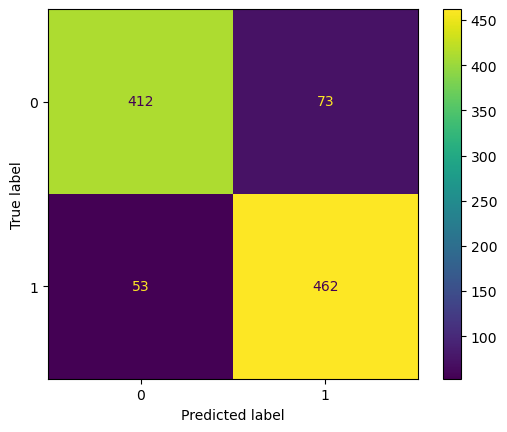

In [64]:
ConfusionMatrixDisplay.from_predictions(y_true,y_predict)
plt.show()

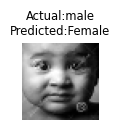

In [65]:
k = np.random.randint(1000)
genders=['Female','Male']
plt.figure(figsize=[1,1])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(f'Actual:{df.gender[y_true[k]]}\nPredicted:{genders[y_predict[k]]}',fontsize='small')
plt.show()

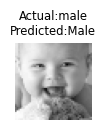

In [66]:
k = np.random.randint(1000)
genders=['Female','Male']
plt.figure(figsize=[1,1])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(f'Actual:{df.gender[y_true[k]]}\nPredicted:{genders[y_predict[k]]}',fontsize='small')
plt.show()

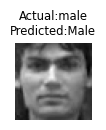

In [71]:
k = np.random.randint(1000)
genders=['Female','Male']
plt.figure(figsize=[1,1])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(f'Actual:{df.gender[y_true[k]]}\nPredicted:{genders[y_predict[k]]}',fontsize='small')
plt.show()

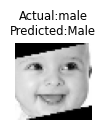

In [949]:
k = np.random.randint(1000)
genders=['Female','Male']
plt.figure(figsize=[1,1])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(f'Actual:{df.gender[y_true[k]]}\nPredicted:{genders[y_predict[k]]}',fontsize='small')
plt.show()